## Intrusion Detection Using Support Vector Machine Algorithm
### Author: Abdullah Al Noman
### Email: an0652@uah.edu
### Course: CPE 590 - Machine Learning for Engineering Applications
### The University of Alabama in Huntsville

#### Importing Libraries

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Mounting Google Drive

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Loading the dataset

In [150]:
col_names = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11",
    "A12","A13","A14","A15","A16","A17","A18","A19","A20","A21","A22",
    "A23","A24","A25","A26","A27","A28","A29","A30","A31","A32","A33",
    "A34","A35","A36","A37","A38","A39","A40","A41","A42","A43"]

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_paper/data_kddcup99.csv', header=None, names=col_names)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


#### Showing attacks

In [151]:
attack = df['A42']
attack.value_counts()

,count
A42,
normal,9711
neptune,4657
guess_passwd,1231
mscan,996
warezmaster,944
apache2,737
satan,735
processtable,685
smurf,665


#### Showing distribution of attacks

<Figure size 640x480 with 0 Axes>

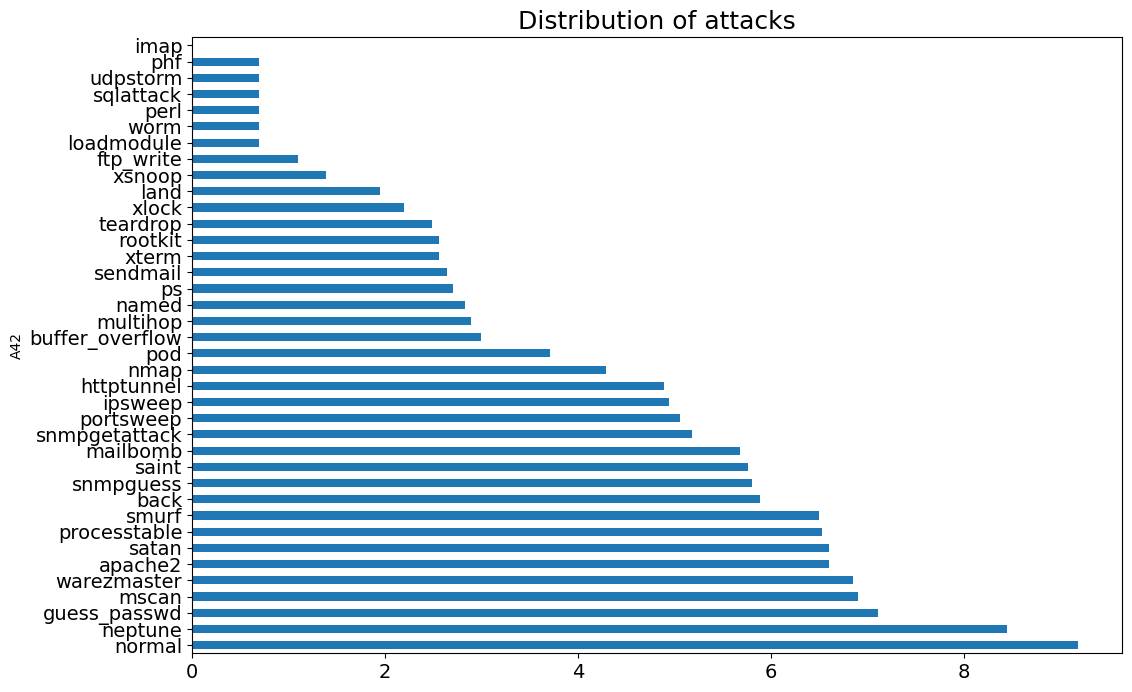

In [152]:
import matplotlib
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
df['A42'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

#### Encoding attack labels temporarily

In [153]:
data = df.copy()
label_encoder = LabelEncoder()
data['A42_encoded'] = label_encoder.fit_transform(data['A42'])
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A35,A36,A37,A38,A39,A40,A41,A42,A43,A42_encoded
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,14
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,14
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21,16
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15,24
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11,11


#### Dropping unused columns

In [154]:
cols_to_drop = ['A7','A8','A9','A10','A11','A13','A14','A15','A16',
                'A17','A18','A19','A20','A21','A22','A42','A43']
data.drop(columns=cols_to_drop, inplace=True)
data.head()

,A1,A2,A3,A4,A5,A6,A12,A23,A24,A25,...,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42_encoded
0,0,tcp,private,REJ,0,0,0,229,10,0.0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,14
1,0,tcp,private,REJ,0,0,0,136,1,0.0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,14
2,2,tcp,ftp_data,SF,12983,0,0,1,1,0.0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,16
3,0,icmp,eco_i,SF,20,0,0,1,65,0.0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,24
4,1,tcp,telnet,RSTO,0,15,0,1,8,0.0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11


#### Labeling encode categorical features

In [155]:
for col in ['A2', 'A3', 'A4']:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

data.rename(columns={'A2': 'A2pp', 'A3': 'A3pp', 'A4': 'A4pp'}, inplace=True)
data.head()

,A1,A2pp,A3pp,A4pp,A5,A6,A12,A23,A24,A25,...,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42_encoded
0,0,1,45,1,0,0,0,229,10,0.0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,14
1,0,1,45,1,0,0,0,136,1,0.0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,14
2,2,1,19,9,12983,0,0,1,1,0.0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,16
3,0,0,13,9,20,0,0,1,65,0.0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,24
4,1,1,55,2,0,15,0,1,8,0.0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11


#### Mapping attack types to 5 class target

In [156]:
attack_mapping = {
    'normal': 0, 'neptune': 1, 'smurf': 1, 'pod': 1, 'back': 1, 'teardrop': 1, 'land': 1,
    'satan': 2, 'ipsweep': 2, 'nmap': 2, 'portsweep': 2, 'saint': 2, 'mscan': 2,
    'warezclient': 3, 'guess_passwd': 3, 'ftp_write': 3, 'imap': 3, 'multihop': 3,
    'phf': 3, 'spy': 3, 'warezmaster': 3,
    'rootkit': 4, 'buffer_overflow': 4, 'loadmodule': 4, 'perl': 4
}
data['target'] = df['A42'].map(attack_mapping).fillna(5).astype(int)
data.head()

,A1,A2pp,A3pp,A4pp,A5,A6,A12,A23,A24,A25,...,A34,A35,A36,A37,A38,A39,A40,A41,A42_encoded,target
0,0,1,45,1,0,0,0,229,10,0.0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,14,1
1,0,1,45,1,0,0,0,136,1,0.0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,14,1
2,2,1,19,9,12983,0,0,1,1,0.0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,16,0
3,0,0,13,9,20,0,0,1,65,0.0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,24,2
4,1,1,55,2,0,15,0,1,8,0.0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11,2


#### Showing target counts

In [157]:
data['target'].value_counts()

,count
target,
0,9711
1,5741
5,2435
2,2421
3,2199
4,37


#### Showing pie chart distribution of multi-class labels

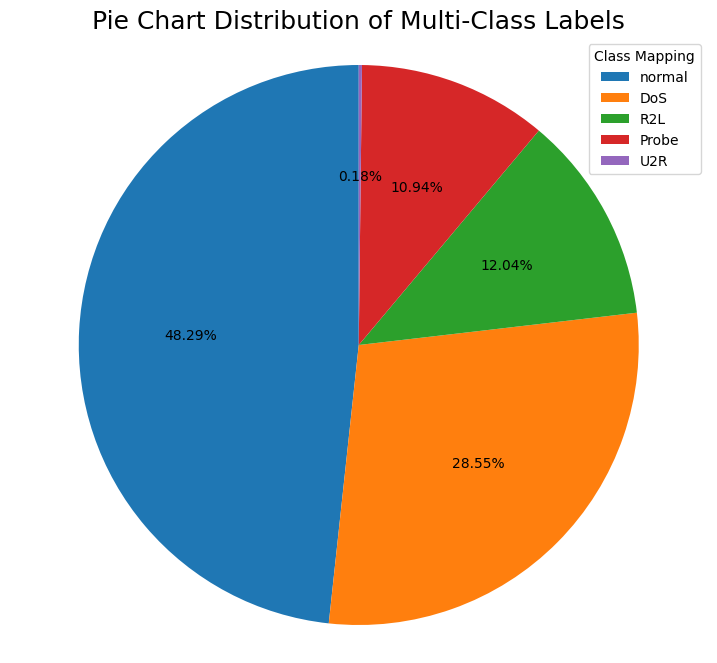

In [158]:
import matplotlib.pyplot as plt

class_legend = {
    0: "normal",
    1: "DoS",
    2: "R2L",
    3: "Probe",
    4: "U2R"
}

valid_targets = data[data['target'].isin(class_legend.keys())]
target_counts = valid_targets['target'].value_counts().sort_index()

plt.figure(figsize=(9, 8))
patches, texts, autotexts = plt.pie(target_counts, autopct='%0.2f%%', startangle=90)

legend_labels = [class_legend[i] for i in target_counts.index]
plt.legend(patches, legend_labels, title="Class Mapping", loc="best")

plt.title('Pie Chart Distribution of Multi-Class Labels')
plt.axis('equal')
plt.show()

#### Normalizing neumerical columuns

In [159]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('target')
data[num_cols] = (data[num_cols] - data[num_cols].min()) / (data[num_cols].max() - data[num_cols].min())
data.head()

,A1,A2pp,A3pp,A4pp,A5,A6,A12,A23,A24,A25,...,A34,A35,A36,A37,A38,A39,A40,A41,A42_encoded,target
0,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.448141,0.019569,0.0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0.378378,1
1,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.266145,0.001957,0.0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0.378378,1
2,0.000035,0.5,0.301587,0.9,2.066513e-04,0.000000,0.0,0.001957,0.001957,0.0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0.432432,0
3,0.000000,0.0,0.206349,0.9,3.183413e-07,0.000000,0.0,0.001957,0.127202,0.0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0.648649,2
4,0.000017,0.5,0.873016,0.2,0.000000e+00,0.000011,0.0,0.001957,0.015656,0.0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0.297297,2


#### Splitting data

In [160]:
X = data[data['target'] != 5].drop(columns=['target'])
y = data[data['target'] != 5]['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

#### PCA transformation

In [161]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### Plotting PCA variance explained

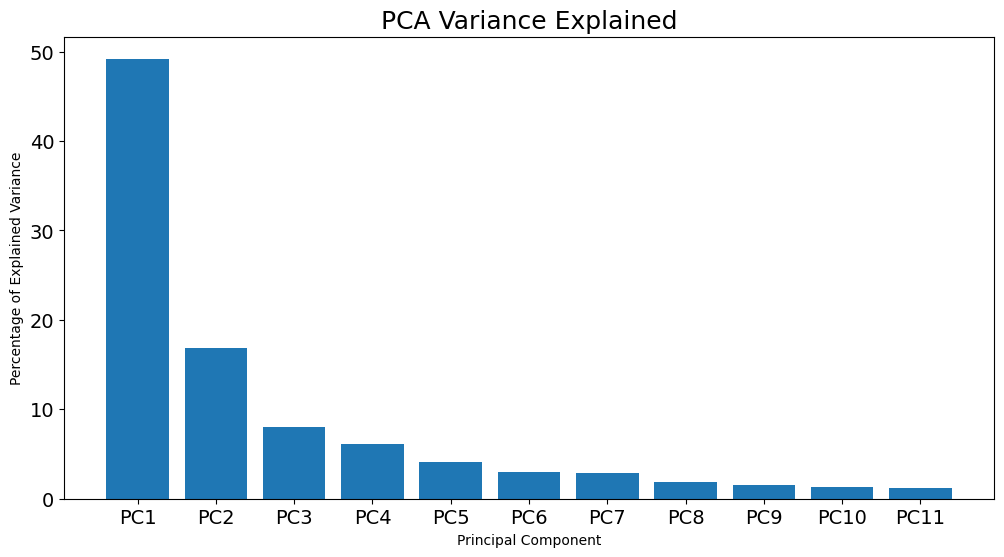

In [162]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(i+1) for i in range(len(per_var))]

plt.figure(figsize=(12,6))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("PCA Variance Explained")
plt.show()

#### Plotting 2D scatter

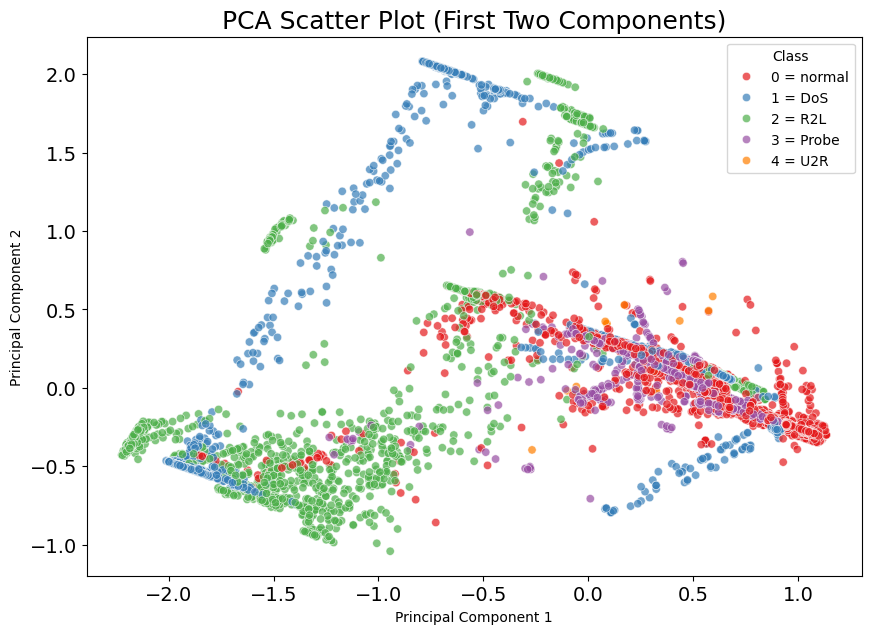

In [163]:
from matplotlib.patches import Patch

pca_df = pd.DataFrame(X_train_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Label'] = y_train.values

label_legend = {
    0: "normal",
    1: "DoS",
    2: "R2L",
    3: "Probe",
    4: "U2R"
}

plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette='Set1', alpha=0.7)

handles, labels = scatter.get_legend_handles_labels()
custom_labels = []
custom_handles = []

for handle, label in zip(handles, labels):
    try:
        numeric_label = int(label)
        if numeric_label in label_legend:
            custom_labels.append(f"{numeric_label} = {label_legend[numeric_label]}")
        else:
            custom_labels.append(f"{numeric_label}")
        custom_handles.append(handle)
    except ValueError:
        continue

plt.legend(custom_handles, custom_labels, title='Class', loc='best')
plt.title("PCA Scatter Plot (First Two Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### Training SVM Classifier

In [164]:
svm = SVC(kernel='rbf', C=500, gamma='scale', max_iter=-1)
svm.fit(X_train_pca, y_train)

y_train_pred = svm.predict(X_train_pca)
y_test_pred = svm.predict(X_test_pca)

#### Evaluating performance

In [165]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.999289570900824
Test Accuracy: 0.9935355544505221


#### Classification detailed report

In [166]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2914
           1       1.00      1.00      1.00      1722
           2       1.00      0.98      0.99       726
           3       0.99      0.99      0.99       660
           4       0.67      0.18      0.29        11

    accuracy                           0.99      6033
   macro avg       0.93      0.83      0.85      6033
weighted avg       0.99      0.99      0.99      6033



#### Showing confusion matrix

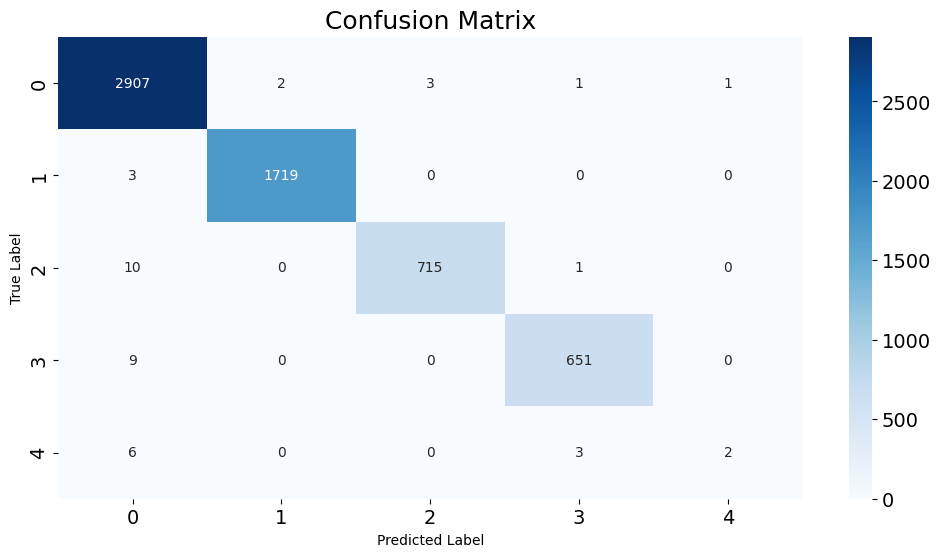

In [167]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Showing target distribution

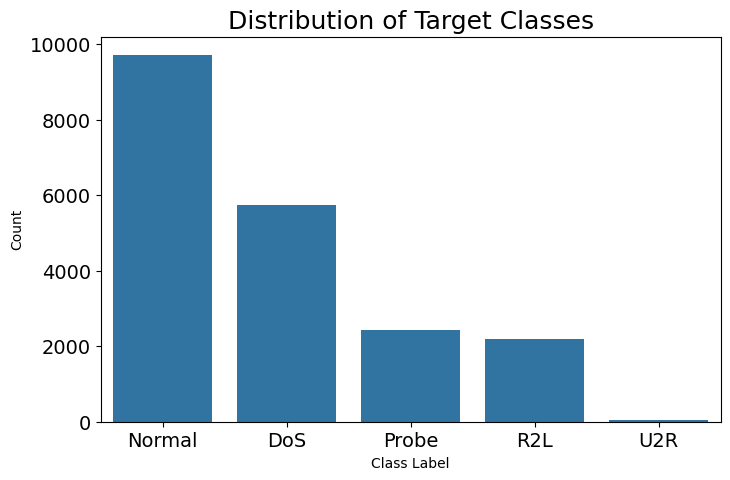

In [168]:
target_counts = y.value_counts().sort_index()
target_labels = ['Normal', 'DoS', 'Probe', 'R2L', 'U2R']

plt.figure(figsize=(8,5))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Distribution of Target Classes")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(len(target_labels)), labels=target_labels)
plt.show()